# Task-1 Regression

Task1-Regression: Prediction of Property Resale Prices – given the information about a property (e.g., size, #rooms, location), your task is to predict its price based. This regression task is implemented as a Kaggle InClass Competition.

## Setting Up the NoteBook

In [1]:
import numpy as np
from sklearn import preprocessing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('../data/train.csv')
data.head()

,listing_id,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,...,furnishing,available_unit_types,total_num_units,property_details_url,lat,lng,elevation,subzone,planning_area,price
0,122881,hdb flat for sale in 866 yishun street 81,sembawang / yishun (d27),866 yishun street 81,hdb 4 rooms,NaN,1988.0,3.0,2.0,1115,...,unspecified,NaN,116.0,https://www.99.co/singapore/hdb/866-yishun-str...,1.414399,103.837196,0,yishun south,yishun,514500.0
1,259374,hdb flat for sale in 506b serangoon north aven...,hougang / punggol / sengkang (d19),hdb-serangoon estate,hdb,99-year leasehold,1992.0,4.0,2.0,1575,...,unspecified,"1, 2, 3, 4, 5, 6 br",NaN,https://www.99.co/singapore/hdb/hdbserangoon-e...,1.372597,103.875625,0,serangoon north,serangoon,995400.0
2,665422,4 bed condo for sale in meyerhouse,128 meyer road,meyerhouse,condo,freehold,2022.0,4.0,6.0,3070,...,partial,"studio, 3, 4, 5, 6 br",56.0,https://www.99.co/singapore/condos-apartments/...,1.298773,103.895798,0,mountbatten,marine parade,8485000.0
3,857699,3 bed condo for sale in leedon green,26 leedon heights,leedon green,Condo,freehold,2023.0,3.0,2.0,958,...,partial,"studio, 1, 2, 3, 4 br",638.0,https://www.99.co/singapore/condos-apartments/...,1.312364,103.803271,0,farrer court,bukit timah,2626000.0
4,216061,2 bed condo for sale in one bernam,1 bernam street,one bernam,condo,99-year leasehold,2026.0,2.0,1.0,732,...,unspecified,"studio, 1, 2, 3, 4, 5 br",351.0,https://www.99.co/singapore/condos-apartments/...,1.273959,103.843635,0,anson,downtown core,1764000.0


## Data Cleaning And EDA Process

In [3]:
print('Before cleaning, there are {} records.'.format(data.shape[0]))
data.isnull().sum()

Before cleaning, there are 20254 records.


listing_id                  0
title                       0
address                     0
property_name               0
property_type               0
tenure                   1723
built_year                922
num_beds                   80
num_baths                 434
size_sqft                   0
floor_level             16746
furnishing                  0
available_unit_types     1441
total_num_units          5652
property_details_url        0
lat                         0
lng                         0
elevation                   0
subzone                   113
planning_area             113
price                       0
dtype: int64

### Drop Some Field

In [4]:
data = data.drop(['elevation', 'floor_level', 'listing_id', 'address', 'property_name', 'title', 'property_details_url',
                  'total_num_units'], axis=1)

### Fill nan value

In [5]:
# fill na by mean
data[['built_year', 'num_beds', 'num_baths']] = data[['built_year', 'num_beds', 'num_baths']].fillna(
    data[['built_year', 'num_beds', 'num_baths']].mean())

# fill na by mode
data['available_unit_types'] = data['available_unit_types'].fillna(data['available_unit_types'].mode()[0])
data['tenure'] = data['tenure'].fillna(data['tenure'].mode()[0])

### Filter out outliers

In [6]:
# filter out outliers
data = data[(data['size_sqft'] <= data['size_sqft'].quantile(0.99)) & (data['size_sqft'] > 10)]

### drop some records

In [7]:
data = data[data['planning_area'].notna()]

In [8]:
print('After cleaning, there are now {} records.'.format(data.shape[0]))
data.isnull().sum()

After cleaning, there are now 19939 records.


property_type           0
tenure                  0
built_year              0
num_beds                0
num_baths               0
size_sqft               0
furnishing              0
available_unit_types    0
lat                     0
lng                     0
subzone                 0
planning_area           0
price                   0
dtype: int64

### Data visualization

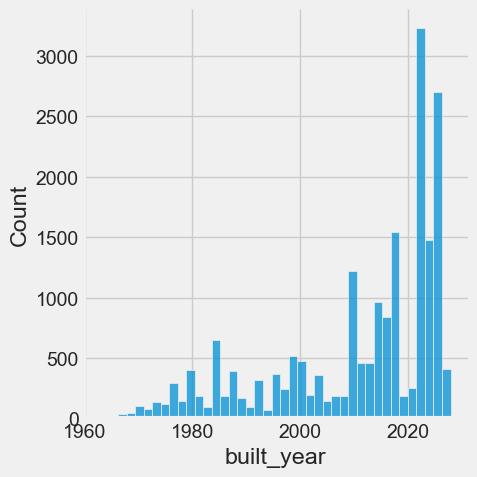

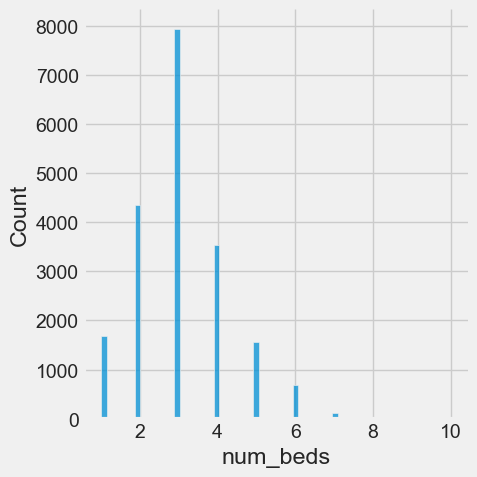

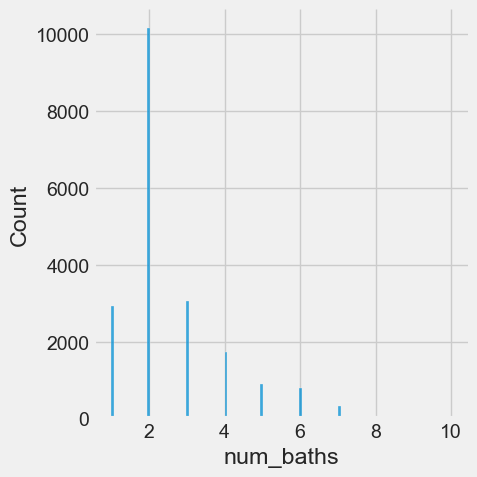

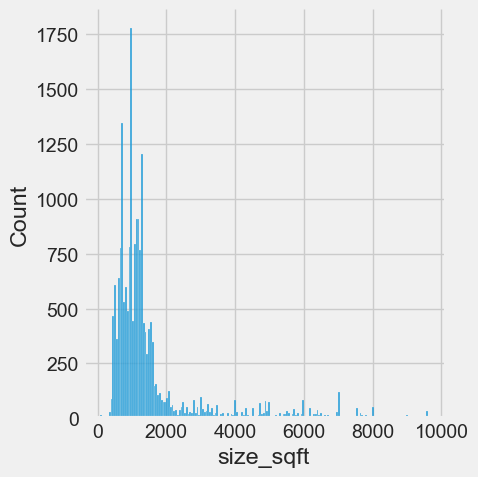

In [9]:
data['built_year'] = data['built_year'].astype(int)
data['num_baths'] = data['num_baths'].astype(int)
data['num_beds'] = data['num_beds'].astype(int)
sns.displot(data, x="built_year")
sns.displot(data, x="num_beds")
sns.displot(data, x="num_baths")
sns.displot(data, x="size_sqft")

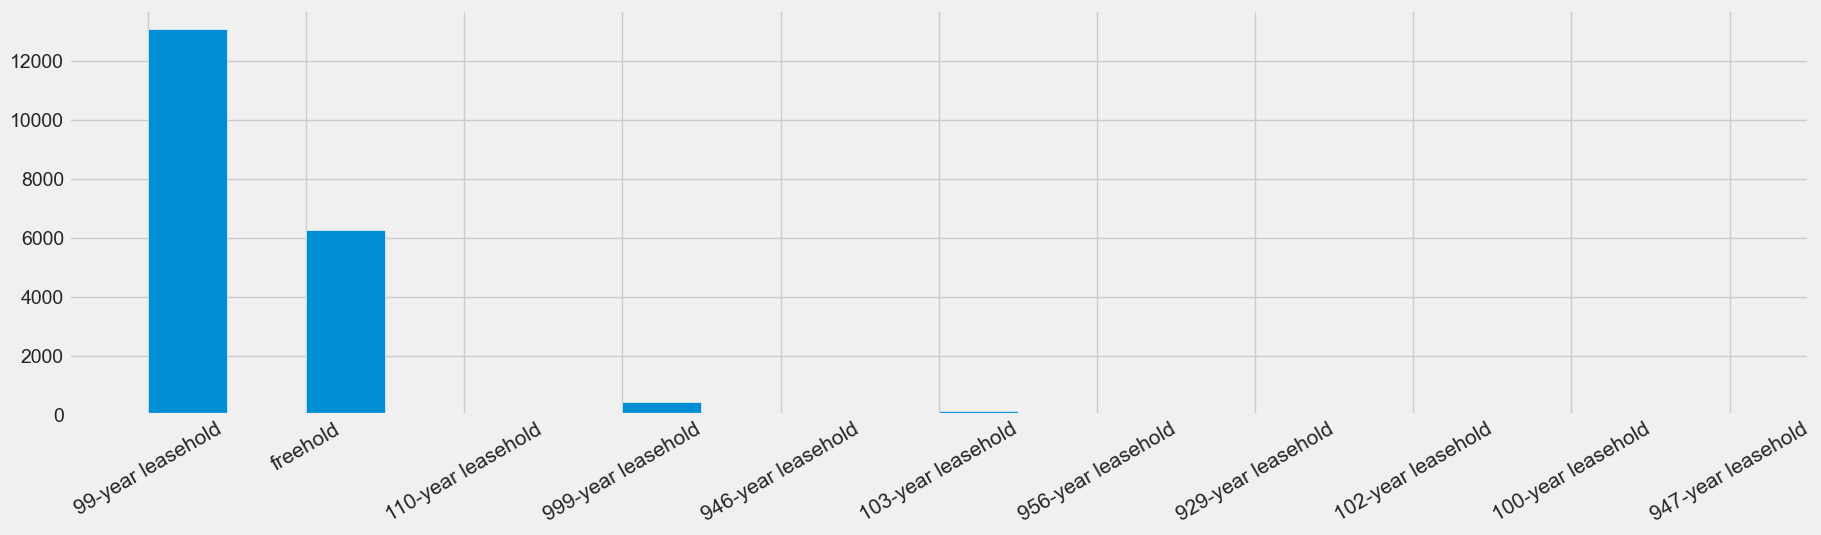

In [10]:
data = data.astype({'tenure': 'string'})
plt.figure(figsize=(20, 5), )
plt.tick_params(axis='x', labelsize=15)
plt.xticks(rotation=30)
plt.hist(data.tenure, bins=20)
plt.show()

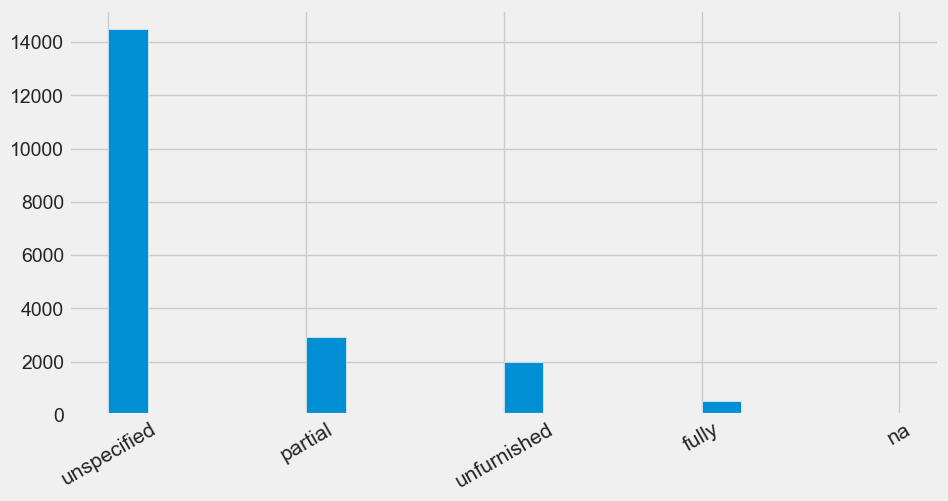

In [17]:
data = data.astype({'furnishing': 'string'})
plt.figure(figsize=(10, 5), )
plt.tick_params(axis='x', labelsize=15)
plt.xticks(rotation=30)
plt.hist(data.furnishing, bins=20)
plt.show()

In [ ]:
print('After cleaning, there are now {} records each with {} attributes'.format(data.shape[0], data.shape[1]))
print(data.head())

### Encoding & Normalization

In [ ]:
labelEnc = preprocessing.LabelEncoder()
normalizer = preprocessing.MinMaxScaler()

data.planning_area = labelEnc.fit_transform(data.planning_area)
data.subzone = labelEnc.fit_transform(data.subzone)
data.furnishing = labelEnc.fit_transform(data.furnishing)
data.tenure = labelEnc.fit_transform(data.tenure)
data.property_type = labelEnc.fit_transform(data.property_type)
data.available_unit_types = labelEnc.fit_transform(data.available_unit_types)

data['size_sqft'] = normalizer.fit_transform(data['size_sqft'].values.reshape(-1,1))
data.lat = normalizer.fit_transform(data.lat.values.reshape(-1,1))
data.lng = normalizer.fit_transform(data.lng.values.reshape(-1,1))

print(data.head())

In [ ]:
sns.set(font_scale=0.5)
heatmap = sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=1)  #data.corr()-->correlation matrix
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=30, fontsize=8)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=8)